In [90]:
!pip install pandas

In [91]:
import pandas as pd

# (b) read CSV
df = pd.read_csv("Salaries.csv", header=0)   # adjust as needed
print(df)



       yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  bedrost01    550000
2        1985    ATL   NL  benedbr01    545000
3        1985    ATL   NL   campri01    633333
4        1985    ATL   NL  ceronri01    625000
...       ...    ...  ...        ...       ...
25570    2015    WAS   NL  treinbl01    512800
25571    2015    WAS   NL  ugglada01    507500
25572    2015    WAS   NL  werthja01  21000000
25573    2015    WAS   NL  zimmejo02  16500000
25574    2015    WAS   NL  zimmery01  14000000

[25575 rows x 5 columns]


In [92]:
# (c) index=playerID, use first row as header, skip second row
df = pd.read_csv("Salaries.csv", index_col="playerID", header=0, skiprows=[1])
print(df)


           yearID teamID lgID    salary
playerID                               
bedrost01    1985    ATL   NL    550000
benedbr01    1985    ATL   NL    545000
campri01     1985    ATL   NL    633333
ceronri01    1985    ATL   NL    625000
chambch01    1985    ATL   NL    800000
...           ...    ...  ...       ...
treinbl01    2015    WAS   NL    512800
ugglada01    2015    WAS   NL    507500
werthja01    2015    WAS   NL  21000000
zimmejo02    2015    WAS   NL  16500000
zimmery01    2015    WAS   NL  14000000

[25574 rows x 4 columns]


In [93]:
# (d) ids in ATL or HOU with salary > 1,000,000
ids = df[(df['teamID'].isin(['ATL','HOU'])) & (df['salary'] > 1_000_000)].index.unique().tolist()

In [94]:
# (e) summary stats for ATL salary
atl_stats = df[df['teamID']=='ATL']['salary'].describe()  # includes std, quartiles, min/max, mean
atl_stats

count    8.850000e+02
mean     2.207749e+06
std      3.434320e+06
min      6.000000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.400000e+06
max      1.606180e+07
Name: salary, dtype: float64

In [95]:
# (f) build dict from iterrows
d = {col: [] for col in df.columns}
for _, row in df.iterrows():
    for col in df.columns:
        d[col].append(row[col])

In [96]:
gdf = pd.DataFrame(d).copy()
gdf.columns = [chr(ord('a')+i) for i in range(len(gdf.columns))]
gdf

,a,b,c,d
0,1985,ATL,NL,550000
1,1985,ATL,NL,545000
2,1985,ATL,NL,633333
3,1985,ATL,NL,625000
4,1985,ATL,NL,800000
...,...,...,...,...
25569,2015,WAS,NL,512800
25570,2015,WAS,NL,507500
25571,2015,WAS,NL,21000000
25572,2015,WAS,NL,16500000


NUMPY

In [97]:
import numpy as np

In [98]:
# (a) list -> array
L = [[1,2,3],[4,5,6]]
A = np.array(L)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [99]:
# (b) inspect
A.ndim, A.shape, A.size, A.dtype, A.itemsize, A.data

(2, (2, 3), 6, dtype('int64'), 8, <memory at 0x10b734a00>)

In [100]:
# (c) reshape/flatten
A2 = A.reshape(3,2)
flat = A.flatten()
A2

array([[1, 2],
       [3, 4],
       [5, 6]])

In [101]:
# (d) slicing
A[0:2, 1:]     
v = np.array([10,20,30,40]); v[1:3]


array([20, 30])

In [102]:
# (e) ops
matrix = np.array([[2, 4, 6, 8],
                   [1, 3, 5, 7],
                   [9, 0, -1, -2]])

print(np.square(matrix))   # squares each element
print(np.argmin(matrix))   # index of minimum value (flattened)
print(np.argmax(matrix))   # index of maximum value (flattened)
print(np.min(matrix))      # smallest element
print(np.max(matrix))      # largest element
print(np.mean(matrix))     # average of elements
print(np.sum(matrix))      # sum of elements
print(np.std(matrix))      # standard deviation

x = [[2, 1], 
     [0, 3]]
y = [[1, 4], 
     [2, 5]]
print(np.dot(x, y))        # matrix product

print(np.sqrt(np.abs(matrix)))   # square root of absolute values

matrix2 = np.array([[3, -5, 7, -9],
                    [4, -2, 6, 8],
                    [-3, 2, -4, 10]])

print(np.abs(matrix2))     # absolute values
print(np.exp(matrix2))     # exponentiate elements
print(np.sign(matrix2))    # sign of elements (-1, 0, 1)

matrix3 = np.array([[5, 7, 9, 11],
                    [2, 2, 2, 2],
                    [-8, -6, -4, -2]])

print(np.mod(matrix2, matrix3))  # modulus


[[ 4 16 36 64]
 [ 1  9 25 49]
 [81  0  1  4]]
11
8
-2
9
3.5
42
3.452052529534663
[[ 4 13]
 [ 6 15]]
[[1.41421356 2.         2.44948974 2.82842712]
 [1.         1.73205081 2.23606798 2.64575131]
 [3.         0.         1.         1.41421356]]
[[ 3  5  7  9]
 [ 4  2  6  8]
 [ 3  2  4 10]]
[[2.00855369e+01 6.73794700e-03 1.09663316e+03 1.23409804e-04]
 [5.45981500e+01 1.35335283e-01 4.03428793e+02 2.98095799e+03]
 [4.97870684e-02 7.38905610e+00 1.83156389e-02 2.20264658e+04]]
[[ 1 -1  1 -1]
 [ 1 -1  1  1]
 [-1  1 -1  1]]
[[ 3  2  7  2]
 [ 0  0  0  0]
 [-3 -4  0  0]]


In [103]:
print(np.arange(0, 10, 2))

print(np.ones((2, 3)))
print(np.zeros((3, 4)))
print(np.eye(4))
print(np.linspace(0, 1, 5))

print(np.concatenate([np.array([1, 2]), np.array([3, 4])]))

[0 2 4 6 8]
[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0.   0.25 0.5  0.75 1.  ]
[1 2 3 4]


In [104]:
!pip install scikit-learn

In [105]:
!pip install matplotlib

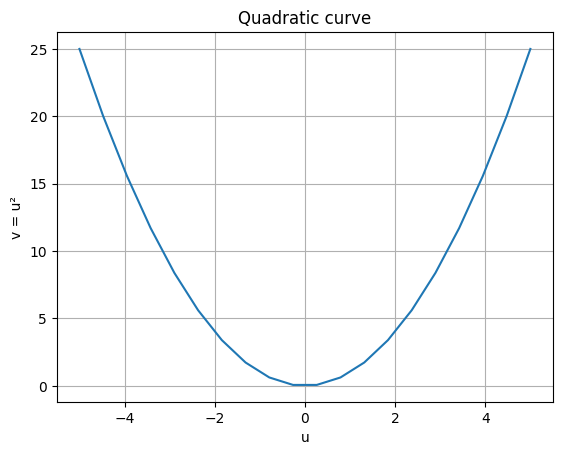

In [106]:
#(a) Basic plot with labels/title/grid
import numpy as np
import matplotlib.pyplot as plt

u_vals = np.linspace(-5, 5, 20)
v_vals = np.array([u**2 for u in u_vals])

plt.plot(u_vals, v_vals)
plt.title("Quadratic curve")
plt.xlabel("u")
plt.ylabel("v = u²")
plt.grid(True)
plt.show()


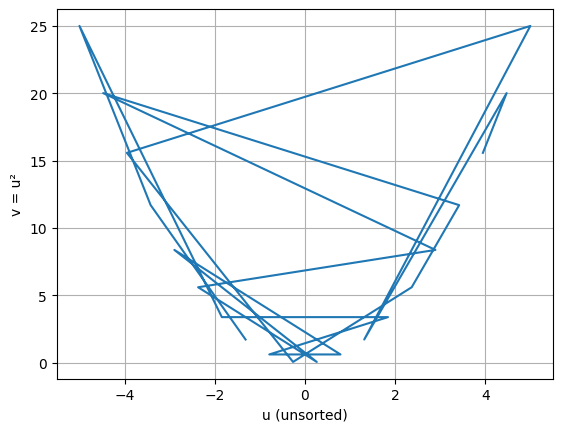

In [107]:
#Unsorted independent variable
import numpy as np
import matplotlib.pyplot as plt

u_shuffled = np.linspace(-5, 5, 20)
np.random.shuffle(u_shuffled)
v_shuffled = np.array([u**2 for u in u_shuffled])

plt.plot(u_shuffled, v_shuffled)      # lines may zig-zag because x is unsorted
# plt.scatter(u_shuffled, v_shuffled)  # use scatter to avoid misleading line connections
plt.xlabel("u (unsorted)")
plt.ylabel("v = u²")
plt.grid(True)
plt.show()

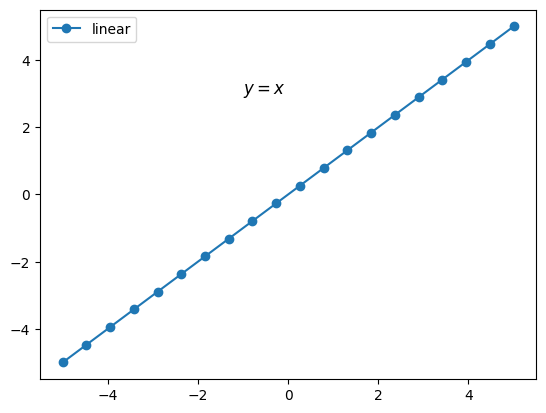

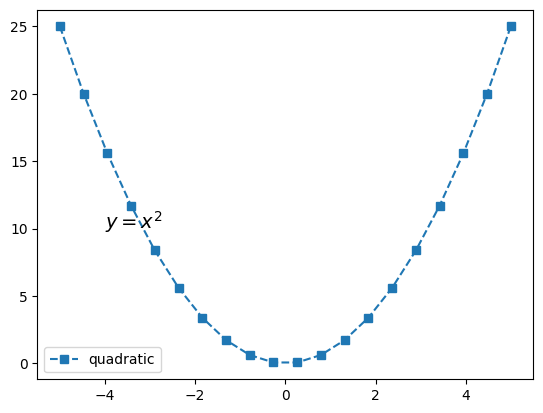

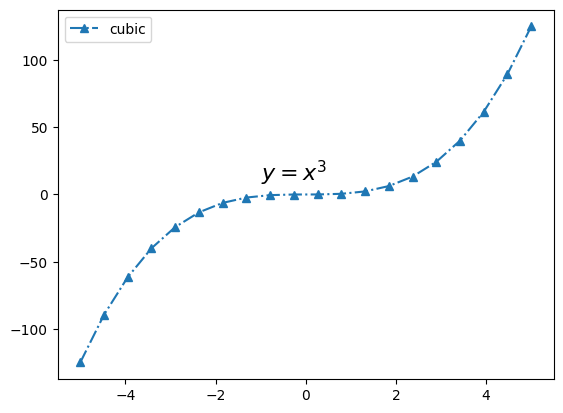

In [108]:
#(b) Multiple series, styles, legends, and annotations
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-5, 5, 20)
f_lin = t
f_quad = t**2
f_cub = t**3

# linear
plt.plot(t, f_lin, linestyle='-', marker='o', label='linear')
plt.legend(loc='best')
plt.text(-1.0, 3.0, r'$y=x$', fontsize=12)
plt.show()

# quadratic
plt.plot(t, f_quad, linestyle='--', marker='s', label='quadratic')
plt.legend(loc='best')
plt.text(-4.0, 10.0, r'$y=x^2$', fontsize=14)
plt.show()

# cubic
plt.plot(t, f_cub, linestyle='-.', marker='^', label='cubic')
plt.legend(loc='best')
plt.text(-1.0, 10.0, r'$y=x^3$', fontsize=16)
plt.show()

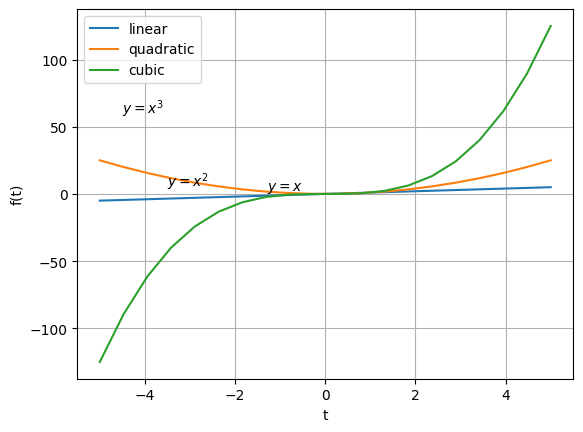

In [109]:
#(c) All curves in one figure (no subplots)
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-5, 5, 20)
f1 = t
f2 = t**2
f3 = t**3

plt.plot(t, f1, label='linear')
plt.plot(t, f2, label='quadratic')
plt.plot(t, f3, label='cubic')

plt.text(-1.3, 2.5, r'$y=x$', fontsize=10)
plt.text(-3.5, 6.0, r'$y=x^2$', fontsize=10)
plt.text(-4.5, 60,  r'$y=x^3$', fontsize=10)

plt.legend(loc='best')
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.show()

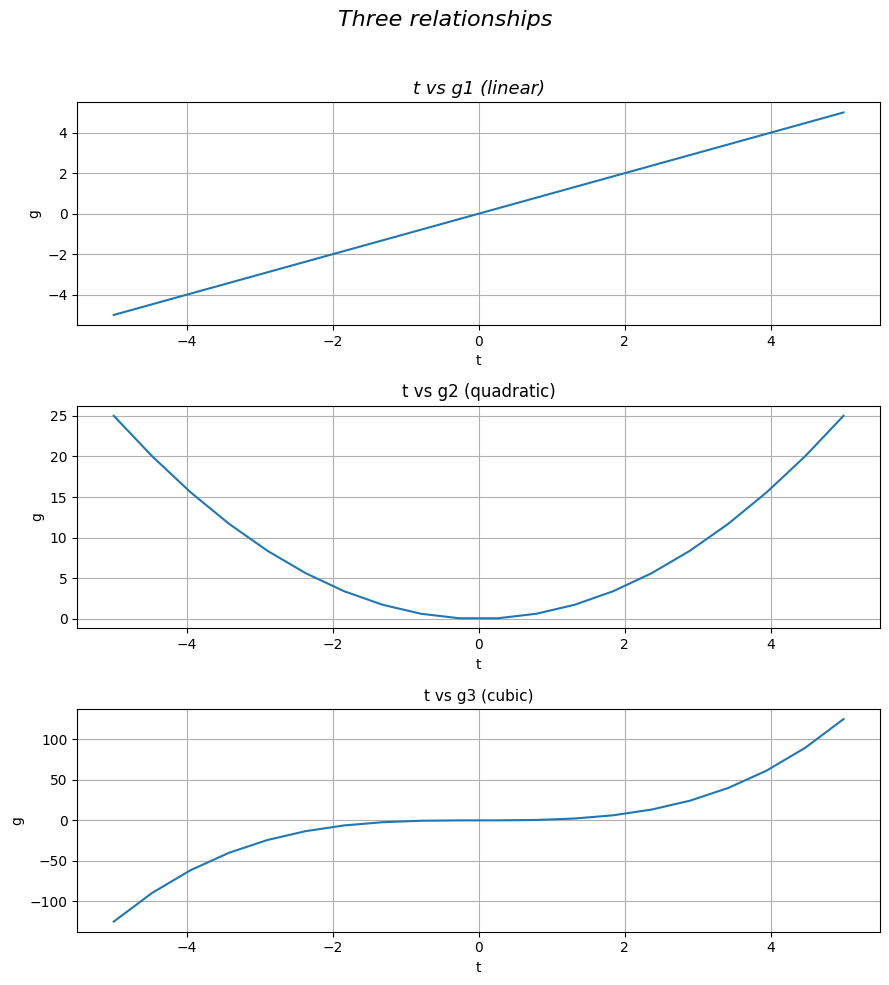

In [110]:
#(d) Subplots with figure title and different styles
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-5, 5, 20)
g1, g2, g3 = t, t**2, t**3

fig, ax_arr = plt.subplots(nrows=3, ncols=1, figsize=(9, 10))
fig.suptitle("Three relationships", fontsize=16, fontstyle='oblique')

ax_arr[0].set_title("t vs g1 (linear)", fontsize=13, fontstyle='italic')
ax_arr[0].plot(t, g1)

ax_arr[1].set_title("t vs g2 (quadratic)", fontsize=12)
ax_arr[1].plot(t, g2)

ax_arr[2].set_title("t vs g3 (cubic)", fontsize=11, fontstyle='normal')
ax_arr[2].plot(t, g3)

for ax in ax_arr:
    ax.grid(True)
    ax.set_xlabel("t")
    ax.set_ylabel("g")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

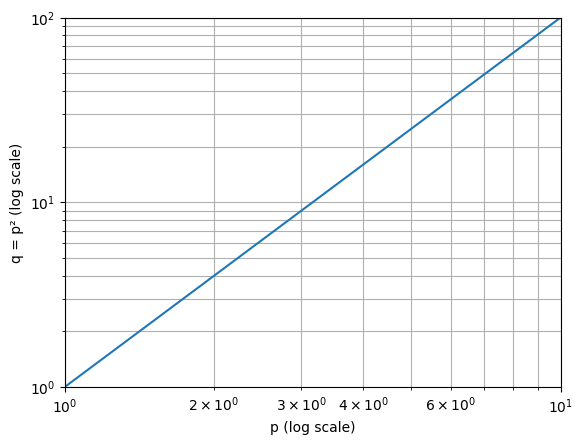

In [111]:
#(e) Axis limits and logarithmic scales (Use positive domain for log scales.)
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(1, 10, 50)  # positive values for log scale
q = p**2

plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 10)
plt.ylim(1, 100)

plt.plot(p, q)
plt.xlabel("p (log scale)")
plt.ylabel("q = p² (log scale)")
plt.grid(True, which='both')
plt.show()

In [112]:
#Pandas DataFrame.plot

import pandas as pd


sals_df = pd.read_csv("Salaries.csv", header=0)

<Axes: title={'center': 'ATL: Salary vs Year'}, xlabel='yearID', ylabel='salary'>

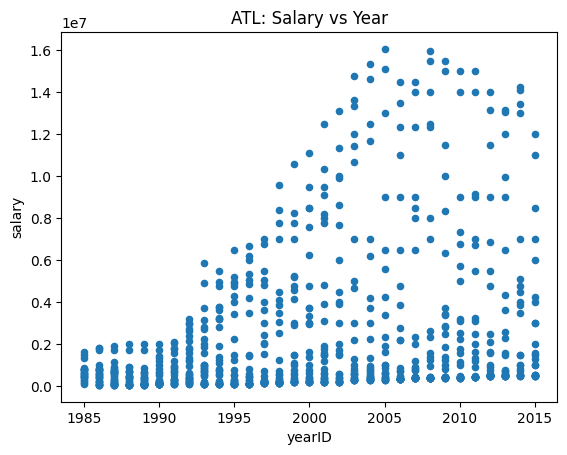

In [113]:
#(a) Team “ATL”: scatter of year vs salary
atl_df = sals_df.query("teamID == 'ATL'")
atl_df.plot(x='yearID', y='salary', kind='scatter', title='ATL: Salary vs Year')

<Axes: title={'center': 'Average Salary by Team (1985)'}, xlabel='teamID'>

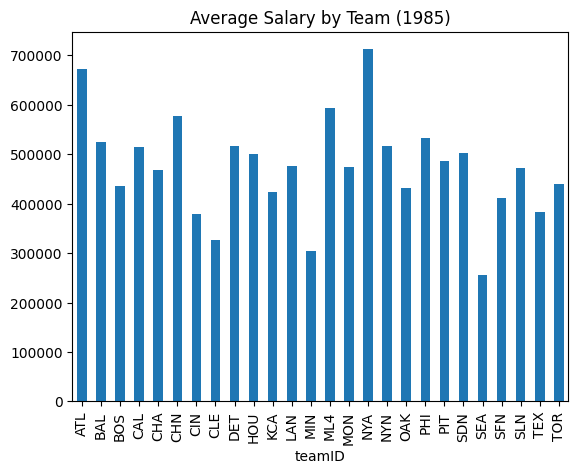

In [114]:
#(b) Year 1985: average salary per team (bar)
yr_85 = sals_df[sals_df['yearID'] == 1985]
avg_by_team = yr_85.groupby('teamID', as_index=False)['salary'].mean()
avg_by_team.set_index('teamID')['salary'].plot(kind='bar', title='Average Salary by Team (1985)')


<Axes: title={'center': 'ATL: Average Salary by Year'}, xlabel='yearID'>

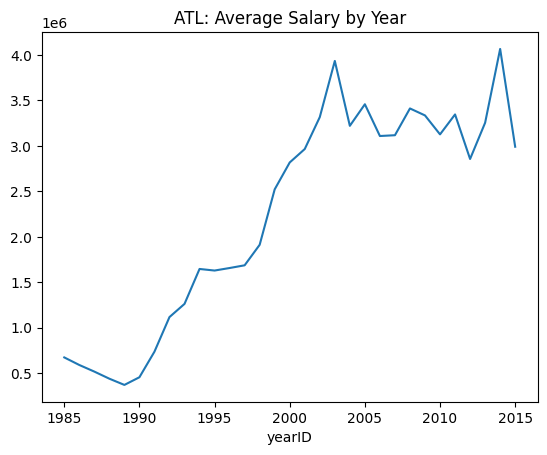

In [115]:
#(c) ATL: annual average salary trend (line)
atl_avg_by_year = (atl_df
                   .groupby('yearID', as_index=True)['salary']
                   .mean()
                   .sort_index())
atl_avg_by_year.plot(kind='line', title='ATL: Average Salary by Year')

In [116]:
!pip install seaborn

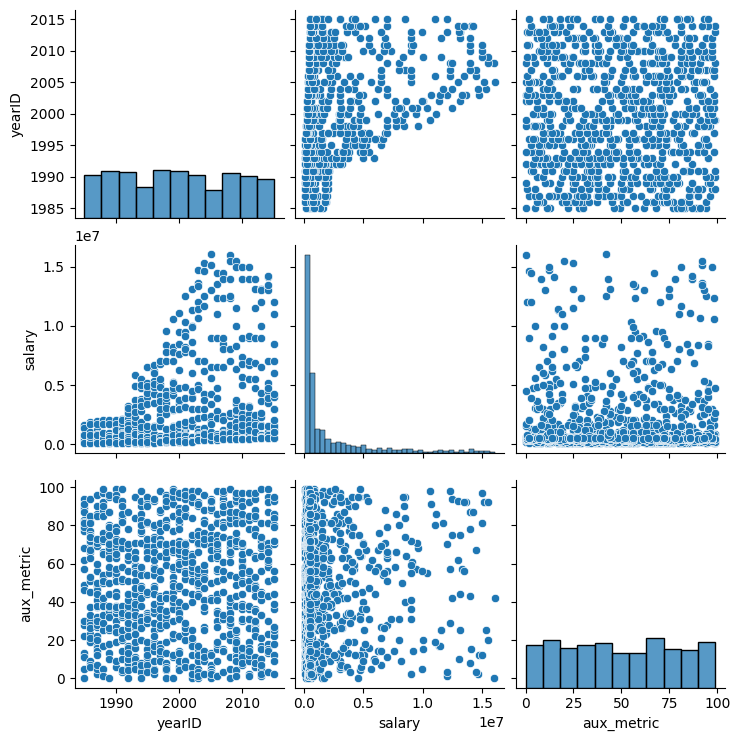

In [117]:
#Seaborn
#(a) Add another numeric column and pairplot (ATL only)
import numpy as np
import seaborn as sns

rng = np.random.default_rng(7)
sals_df['aux_metric'] = rng.integers(0, 100, size=len(sals_df))

atl_df = sals_df[sals_df['teamID'] == 'ATL']
sns.pairplot(atl_df.select_dtypes(include=['number']))  # only numeric columns

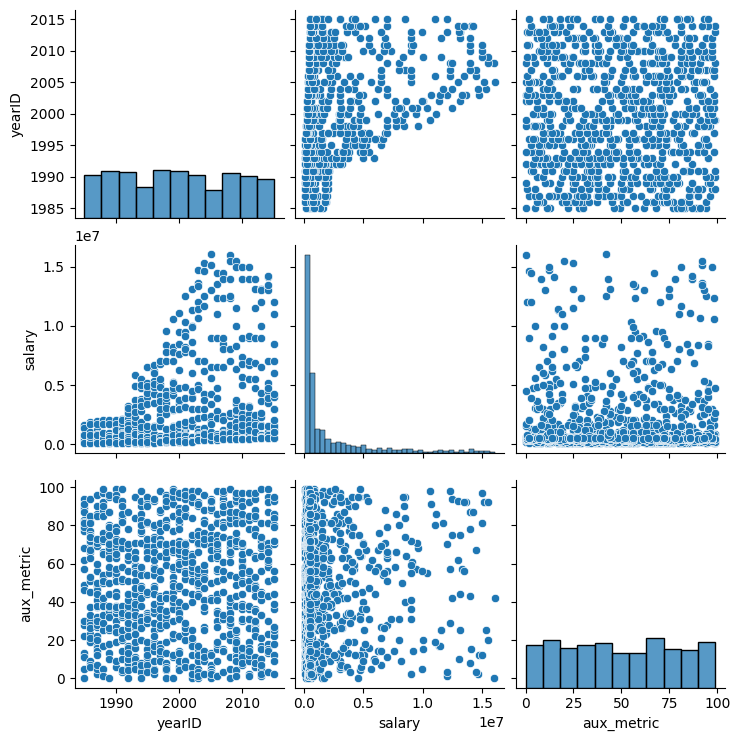

In [118]:
#Seaborn
#(a) Add another numeric column and pairplot (ATL only)
import numpy as np
import seaborn as sns

rng = np.random.default_rng(7)
sals_df['aux_metric'] = rng.integers(0, 100, size=len(sals_df))

atl_df = sals_df[sals_df['teamID'] == 'ATL']
sns.pairplot(atl_df.select_dtypes(include=['number']))  # only numeric columns

<Axes: xlabel='teamID', ylabel='salary'>

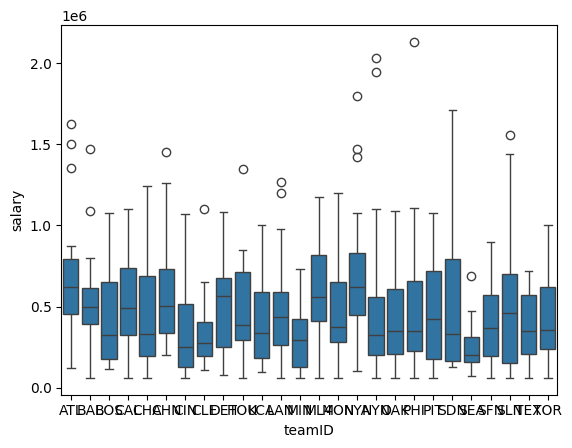

In [119]:
#(b) Year 1985: boxplot of salary distribution by team
yr_85 = sals_df[sals_df['yearID'] == 1985]
sns.boxplot(x='teamID', y='salary', data=yr_85)